In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# This will prompt you to upload the file
print("Please upload your heart.csv file")
uploaded = files.upload()

Please upload your heart.csv file


Saving heart.csv to heart.csv


In [2]:
# Get the filename and load it into a pandas DataFrame
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Display the first 5 rows to confirm it's loaded correctly
print("Data Preview:")
df.head()

Data Preview:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


/tmp/ipython-input-3679431984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='viridis') # Using a color palette


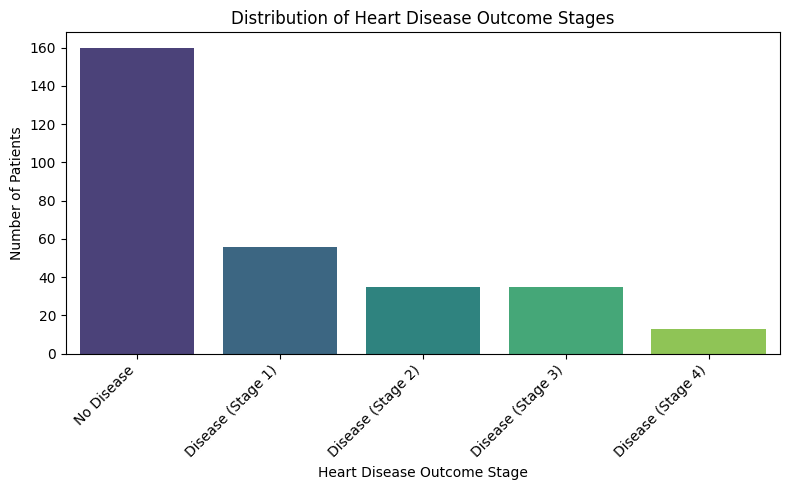

In [14]:
# Create a count plot for the 'num' column with better labels
plt.figure(figsize=(8, 5)) # Slightly increased figure size for readability
sns.countplot(x='num', data=df, palette='viridis') # Using a color palette

# Define clear labels for the 'num' column
# Based on UCI Heart Disease dataset documentation, 'num' (or 'target') values are:
# 0 = no disease
# 1 = disease (stage 1)
# 2 = disease (stage 2)
# 3 = disease (stage 3)
# 4 = disease (stage 4)
# (Note: Some datasets simplify to 0=no disease, 1=disease. Your data has 0-4.)
labels = {
    0: 'No Disease',
    1: 'Disease (Stage 1)',
    2: 'Disease (Stage 2)',
    3: 'Disease (Stage 3)',
    4: 'Disease (Stage 4)'
}

# Apply custom labels to the x-axis ticks
plt.xticks(ticks=range(len(labels)), labels=[labels[i] for i in sorted(labels.keys())], rotation=45, ha='right')

plt.title('Distribution of Heart Disease Outcome Stages')
plt.xlabel('Heart Disease Outcome Stage')
plt.ylabel('Number of Patients')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

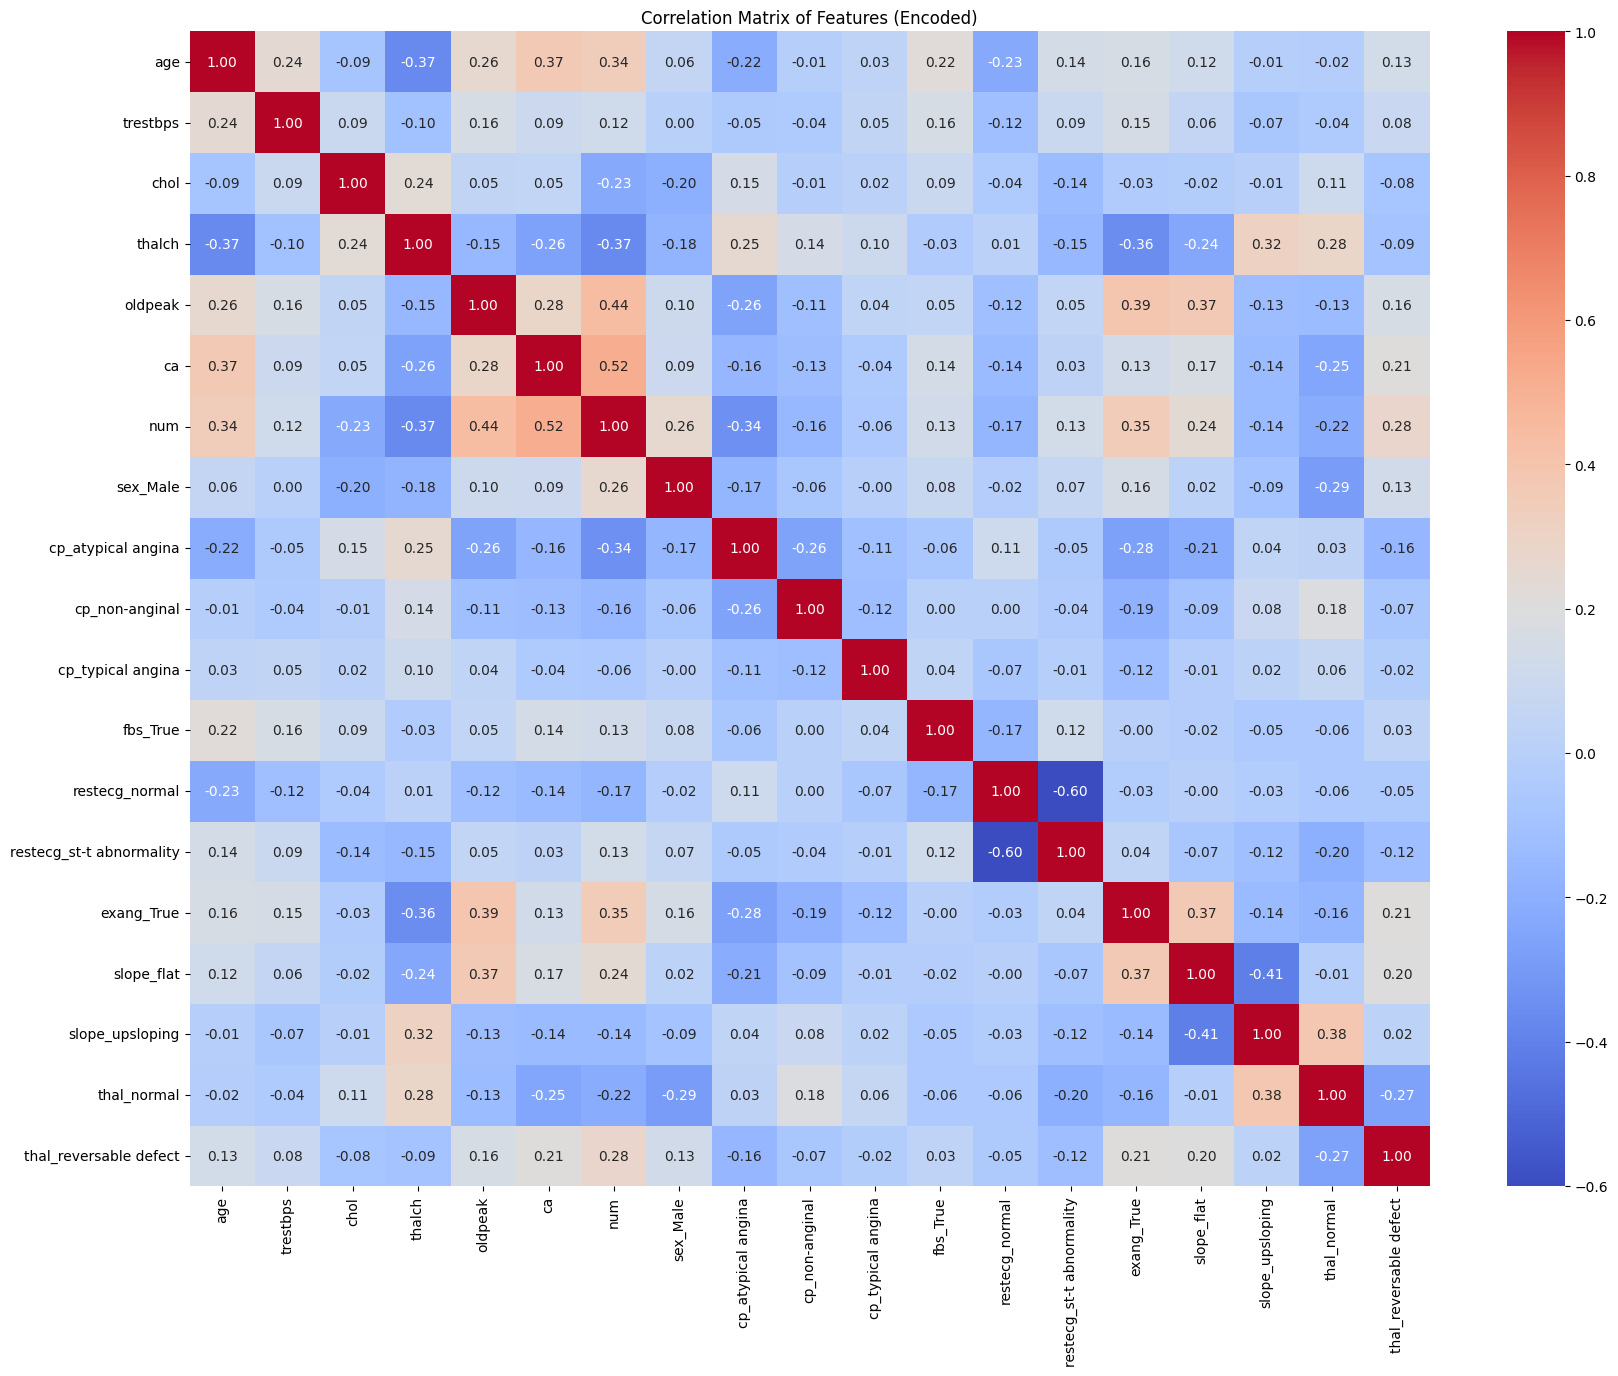

In [6]:
# Create a copy of the dataframe to work with
df_encoded = df.copy()

# Drop the 'id' and 'dataset' columns as they are not useful features for correlation
df_encoded = df_encoded.drop(['id', 'dataset'], axis=1)

# Use pandas get_dummies to automatically convert all text columns to numbers
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Now, create the correlation matrix heatmap with the fully numerical dataframe
plt.figure(figsize=(20, 15)) # Increased size to fit all new columns
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (Encoded)')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Make sure to drop any rows with missing values first
df.dropna(inplace=True)

# --- 1. Define Features (X) and Target (y) using your column 'num' ---
X = df.drop(['id', 'dataset', 'num'], axis=1)
y = df['num']

# --- 2. Identify different column types ---
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# --- 3. Create a preprocessor to handle both column types ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- 4. Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Apply the preprocessing ---
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Data has been successfully prepared for modeling!")
print(f"Shape of training data (X_train): {X_train.shape}")

Data has been successfully prepared for modeling!
Shape of training data (X_train): (239, 25)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and print the performance report
y_pred_lr = log_reg.predict(X_test)
print("--- Classification Report for Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))

--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.50      0.46      0.48        13
           2       0.00      0.00      0.00         5
           3       0.14      0.25      0.18         4
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.31      0.33      0.31        60
weighted avg       0.64      0.65      0.64        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions and print the performance report
y_pred_rf = rf_clf.predict(X_test)
print("--- Classification Report for Random Forest ---")
print(classification_report(y_test, y_pred_rf))

--- Classification Report for Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.12      0.08      0.10        13
           2       0.27      0.60      0.38         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.25      0.33      0.28        60
weighted avg       0.56      0.63      0.59        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.svm import SVC

# Initialize and train the model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions and print the performance report
y_pred_svm = svm_clf.predict(X_test)
print("--- Classification Report for Support Vector Machine (SVM) ---")
print(classification_report(y_test, y_pred_svm))

--- Classification Report for Support Vector Machine (SVM) ---
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.43      0.23      0.30        13
           2       0.17      0.20      0.18         5
           3       0.14      0.25      0.18         4
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.31      0.32      0.31        60
weighted avg       0.60      0.63      0.61        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Calculate the accuracy for each model
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [acc_lr, acc_rf, acc_svm]
}).sort_values(by='Accuracy', ascending=False)

print("--- Final Model Performance Comparison ---")
print(comparison_df)

--- Final Model Performance Comparison ---
                    Model  Accuracy
0     Logistic Regression  0.650000
1           Random Forest  0.633333
2  Support Vector Machine  0.633333
